In [1]:
import numpy as np
from scipy.signal import StateSpace, dlsim
import matplotlib.pyplot as plt

In [2]:
# Assigning value to constants

g = np.asarray([[1., 0.2, 0.1], 
             [0.1, 2., 0.1], 
             [0.3, 0.1, 3.]])
alpha = 1.2  
sigma = 0.1  #self noise

p1 = float(input("Enter the initial value of p1:",))
p2 = float(input("Enter the initial value of p2:",))
p3 = float(input("Enter the initial value of p3:",))
gamma = float(input("Enter the value of threshold:",))

Enter the initial value of p1: 0.1
Enter the initial value of p2: 0.1
Enter the initial value of p3: 0.1
Enter the value of threshold: 3


In [3]:
#Calculating the value of A, B, C & D
A = np.asarray(np.zeros((3,3), dtype=float))
B = np.asarray(np.zeros((3,1), dtype=float))

#Using the formula calculated in Ex2 Q1
for i in range(0,3):
    for j in range(0,3):
        if i==j:
            A[i,j] = 0.
        else:
            A[i,j] = (alpha*gamma)*(g[i,j]/g[i,i])    #Using the formula calculated in Ex2 Q1

for i in range(0,3):
    for j in range(0,1):
            B[i,j] = alpha*gamma*1/g[i,i]      #Using the formula calculated in Ex2 Q1

C = np.identity(3, dtype=float)
D = np.zeros((3,1), dtype=float)

drone_sys = StateSpace(A,B,C,D,dt=1)

In [4]:
T= int(input("Enter Time(s) upto which the system runs"))
t = np.arange(0, T, 1)
u = np.ones((1,len(t)))
u = sigma**2 * u
u = np.transpose(u)      # taking transpose to make sure number of rows in 'u' is same as elements in 't'
# u  = sigma**2 * np.ones_like(t)
_, y, x = dlsim(drone_sys, u, t, x0=[p1, p2, p3])  # Using the dlsim function for discrete systems

Enter Time(s) upto which the system runs 25


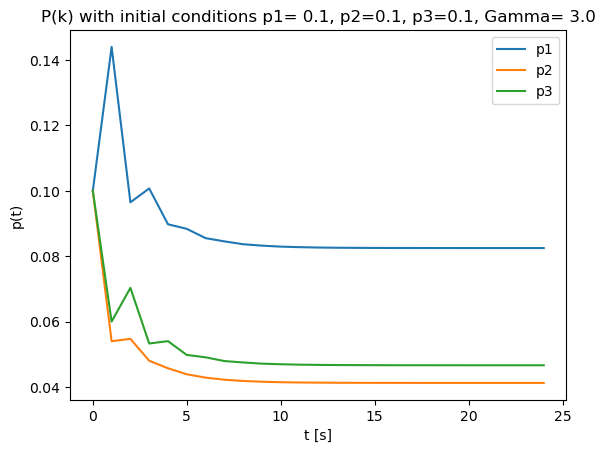

In [5]:
#Plotting 'P' as a function of time
plt.figure(dpi=100)
plt.plot(t, y[:,0], label= 'p1')
plt.plot(t, y[:,1], label= 'p2')
plt.plot(t, y[:,2], label= 'p3')
plt.legend(loc='upper right')
plt.ylabel('p(t)')
plt.xlabel('t [s]')
plt.title('P(k) with initial conditions p1= {}, p2={}, p3={}, Gamma= {}'.format(p1,p2,p3,gamma))
plt.show()

In [6]:
#Computing the value of SINR
S = np.ones_like(y)   #creating S with the same dimensions as 'y'
for i in t:
    for j in range(0,3):
        s_small = g[j,j]*y[i,j]
        q = sigma**2
        for k in range(0,3):
            if j!=k:
                q += g[j,k]*y[i,k]
        S[i,j] = s_small/q 

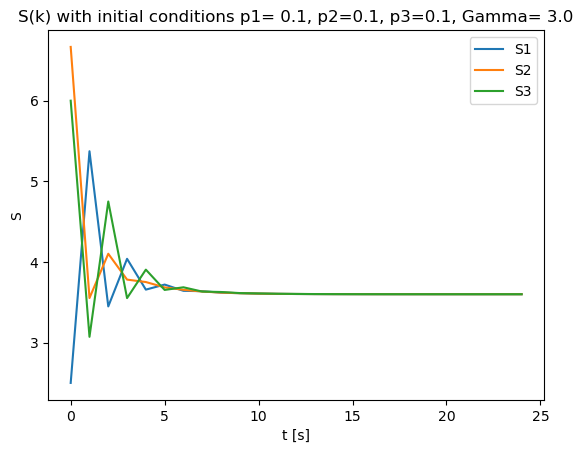

In [7]:
#Plotting 'S' as a function of time
plt.figure(dpi=100)
plt.plot(t, S[:,0], label= 'S1')
plt.plot(t, S[:,1], label= 'S2')
plt.plot(t, S[:,2], label= 'S3')
plt.legend(loc='upper right')
plt.ylabel('S')
plt.xlabel('t [s]')
plt.title('S(k) with initial conditions p1= {}, p2={}, p3={}, Gamma= {}'.format(p1,p2,p3,gamma))
plt.show()

In [8]:
#Displaying the S(t) matrix
S

array([[2.5       , 6.66666667, 6.        ],
       [5.37313433, 3.55263158, 3.07167235],
       [3.44867029, 4.10194903, 4.74963977],
       [4.03909087, 3.78122677, 3.55197919],
       [3.65694569, 3.75103862, 3.90488145],
       [3.71971169, 3.68488022, 3.65311752],
       [3.6420946 , 3.65475263, 3.68600349],
       [3.63763772, 3.63304051, 3.63281054],
       [3.61870166, 3.6203637 , 3.62756671],
       [3.61299761, 3.61239746, 3.61409893],
       [3.60735214, 3.60756856, 3.60960327],
       [3.60468701, 3.60460901, 3.6054883 ],
       [3.60277917, 3.60280726, 3.60347471],
       [3.60171897, 3.60170885, 3.60206782],
       [3.6010365 , 3.60104015, 3.60127591],
       [3.60063433, 3.60063302, 3.60077032],
       [3.60038475, 3.60038523, 3.60047103],
       [3.60023459, 3.60023442, 3.60028583],
       [3.60014259, 3.60014265, 3.60017422],
       [3.60008682, 3.6000868 , 3.60010591],
       [3.60005281, 3.60005282, 3.60006448],
       [3.60003214, 3.60003214, 3.60003922],
       [3.